In [176]:
# https://zhuanlan.zhihu.com/p/437747308

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

base_dir = '../record/local/2021_12_10_11_25_54/'
file_list = os.listdir(base_dir)

file_list.sort()

flow = {}


data = {}

data["Time (s)"] = []
data["Throughput (Mbps)"] = []
data["Flow"] = []

for file in file_list:
    if('csv' in file):
        flow_id = int(file.split('_')[1])
        CC = file.split('_')[2].upper()
        df = pd.read_csv(os.path.join(base_dir,file))
        time = df['time'].values
        delivery_rate = df['server_sending_rate']
        
        if(flow_id == 0):
            
            time = time[0:int(0.26*len(time))]
            delivery_rate = delivery_rate[0:int(0.26*len(delivery_rate))]
            
            min_time = min(time)
            time = time - min_time
        else:
            time = time - min_time
        time = np.append(time, time[-1]+1)
        delivery_rate = np.append(delivery_rate, 0)
            
            
        data["Time (s)"]+=(list(time))
        data["Throughput (Mbps)"]+=(list(delivery_rate))
        data["Flow"]+=(list(["Flow "+str(flow_id+1)]*len(delivery_rate)))
        
        
        print(f"flow #{flow_id}: length = {len(delivery_rate)}")
        
        flow[flow_id] = delivery_rate
        
        
        

        

flow #0: length = 5044
flow #1: length = 3350
flow #2: length = 1977
flow #3: length = 698


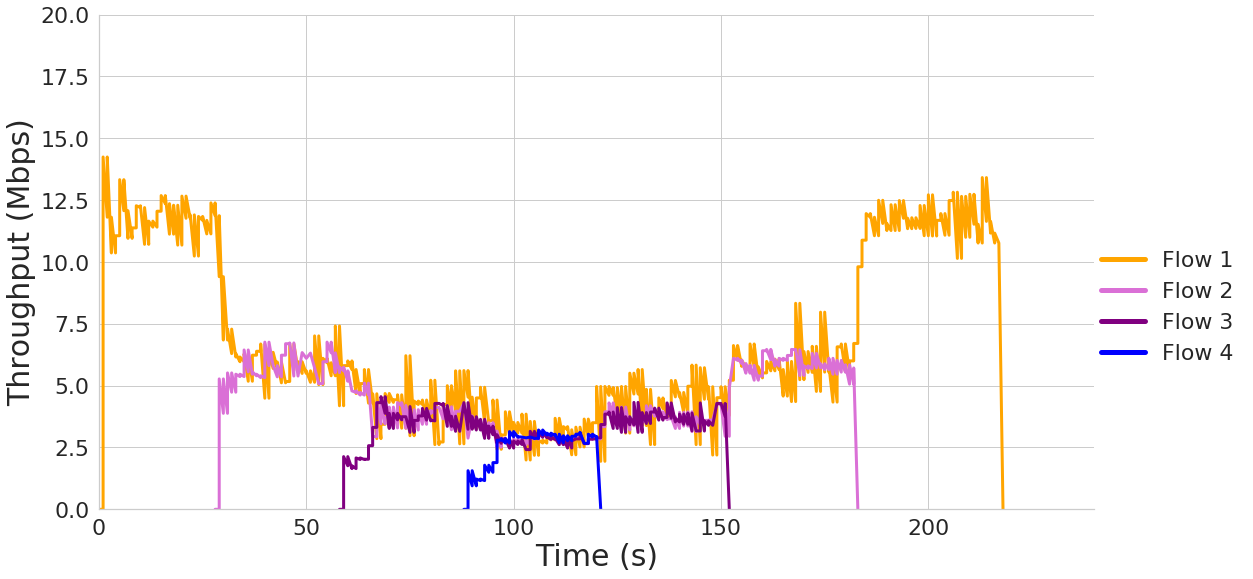

In [177]:
X_LIMIT = (0, 240)
Y_LIMIT = (0, 20)

sns.set(font_scale=2)
sns.set_style("whitegrid")


g = sns.relplot(x="Time (s)", y="Throughput (Mbps)", hue="Flow", height=8, aspect=15/8,
                palette=['orange', 'orchid', 'purple', 'blue'], linewidth = 3,
                estimator=None,
                kind="line", data=data)

g._legend.set_title("  ")

for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [500] 
    lh._linewidth = 5
    
g.set(xlim=X_LIMIT,ylim=Y_LIMIT)
g.set_ylabels(fontsize=30)
g.set_xlabels(fontsize=30)

g.savefig("./fairness.png", dpi = 400)    

In [130]:
a = [1,2,3]
a+=[1, 1]

In [115]:
a

[1, 2, 3, 1, 1]

In [171]:
base_dir = '../record/local/2021_12_10_11_25_54/'
file_list = os.listdir(base_dir)

file_list.sort()

In [172]:
file_list

['.ipynb_checkpoints',
 'server_0_monax_epoch_0.csv',
 'server_1_monax_epoch_0.csv',
 'server_2_monax_epoch_0.csv',
 'server_3_monax_epoch_0.csv']